In [1]:
import os
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import re
import nltk
from nltk.tokenize import TweetTokenizer
import numpy as np
from nltk.corpus import stopwords
import string
from nltk import FreqDist
import seaborn as sns

import warnings

In [2]:
df=pd.read_csv('C:/Users/anshi/Desktop/143P/D1search_results_Walker.csv')
df

,user_country,source,content,date
0,ssa,Twitter for iPhone,@ianvictor69 i'll kill you - summer walker,2020-09-29T23:59:56+00:00
1,NaN,Twitter Web App,@YahooNews Yahoo's Francis stirs the pot but l...,2020-09-29T23:59:42+00:00
2,"Toronto, Ontario",Twitter for iPhone,Dias signing for Man City means Pep has signed...,2020-09-29T23:59:36+00:00
3,Worldwide,Twitter for Android,Pep Guardiola has spent over £400 million on d...,2020-09-29T23:59:31+00:00
4,"California, USA",Twitter for Android,@samanthamarika1 Jameson/Johnnie Walker +🍿,2020-09-29T23:59:11+00:00
...,...,...,...,...
1995,Wellington Florida,Twitter Web App,"Why hasn't Kenneth Walker, Breonna Taylor's bo...",2020-09-29T19:57:36+00:00
1996,"Texas, USA",Twitter for iPhone,Eating for the day Patriots use a Military Lou...,2020-09-29T19:57:32+00:00
1997,"Spring Dale, WV",Twitter for iPhone,He did WHAT?! https://t.co/o9yq5kVWeZ,2020-09-29T19:57:29+00:00
1998,NaN,Twitter for iPhone,@walker_slim @ruco_mon @JoeBiden You posted a ...,2020-09-29T19:57:15+00:00


In [3]:
tknzr = TweetTokenizer()

def tokenizer_tweets(df):
    
    text = ''
    for t in df['content']:
        text += t
    tokens = [i.lower() for i in tknzr.tokenize(text)]
    
    return tokens

tokens = tokenizer_tweets(df)
print(len(tokens))
print(tokens[:20])

49992
['@ianvictor69', "i'll", 'kill', 'you', '-', 'summer', 'walker', '@yahoonews', "yahoo's", 'francis', 'stirs', 'the', 'pot', 'but', 'lays', 'low', 'on', 'twitter', '.', 'we']


In [4]:
mean = np.mean([len(i) for i in df.content])

print("The lenght's average in tweets: %.2f%%" % mean)

The lenght's average in tweets: 143.54%


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

def clear_tokens(tokens):
    
    tokens_cl = [t for t in tokens if (len(t) >= 3) 
                 and (not t.startswith(('#', '@')))
                 and (not t.startswith('http'))
                 and (t not in stop)
                 and (t[0].isalpha())]
    
    return tokens_cl

tokens_cl = clear_tokens(tokens)
print(len(tokens_cl))
print(tokens_cl[:20])

20804
["i'll", 'kill', 'summer', 'walker', "yahoo's", 'francis', 'stirs', 'pot', 'lays', 'low', 'twitter', 'either', 'live', 'country', 'mob', 'justice', 'adhere', 'due', 'process', 'investig']


In [7]:
def get_top20_of(i, n=20):
    return FreqDist([t for t in tokens if t.startswith(i)]).most_common(n)

In [8]:
get_top20_of('@')

[('@austin_walker', 37),
 ('@chrisjohnsonmd', 30),
 ('@immunotoxphd', 30),
 ('@thefrankmanmn', 30),
 ('@monstercoyliar', 30),
 ('@chaoticsx2', 30),
 ('@ianfmusgrave', 30),
 ('@doritmi', 30),
 ('@wendyorent', 30),
 ('@frankdelia7', 30),
 ('@jkellyca', 30),
 ('@bluelionblog', 30),
 ('@janeeopie', 30),
 ('@takethatcdc', 30),
 ('@meddlinmegs', 30),
 ('@sheldon_walker_', 30),
 ('@bglthmnd', 29),
 ('@rosewind2007', 29),
 ('@kfunk937', 28),
 ('@smcwoof', 28)]

In [9]:
def clean_tweet(tweet):
    '''
    Function to clean the text in a tweet by removing links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def get_tweet_sentiment(tweet):
    #Function to classify sentiments of passed tweets using TextBlob's sentiment method
    analysis = TextBlob(clean_tweet(tweet))
    #set sentiments
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [10]:
df['sentiment'] = [get_tweet_sentiment(t) for t in df.content]
df

,user_country,source,content,date,sentiment
0,ssa,Twitter for iPhone,@ianvictor69 i'll kill you - summer walker,2020-09-29T23:59:56+00:00,Neutral
1,NaN,Twitter Web App,@YahooNews Yahoo's Francis stirs the pot but l...,2020-09-29T23:59:42+00:00,Positive
2,"Toronto, Ontario",Twitter for iPhone,Dias signing for Man City means Pep has signed...,2020-09-29T23:59:36+00:00,Neutral
3,Worldwide,Twitter for Android,Pep Guardiola has spent over £400 million on d...,2020-09-29T23:59:31+00:00,Negative
4,"California, USA",Twitter for Android,@samanthamarika1 Jameson/Johnnie Walker +🍿,2020-09-29T23:59:11+00:00,Neutral
...,...,...,...,...,...
1995,Wellington Florida,Twitter Web App,"Why hasn't Kenneth Walker, Breonna Taylor's bo...",2020-09-29T19:57:36+00:00,Negative
1996,"Texas, USA",Twitter for iPhone,Eating for the day Patriots use a Military Lou...,2020-09-29T19:57:32+00:00,Negative
1997,"Spring Dale, WV",Twitter for iPhone,He did WHAT?! https://t.co/o9yq5kVWeZ,2020-09-29T19:57:29+00:00,Neutral
1998,NaN,Twitter for iPhone,@walker_slim @ruco_mon @JoeBiden You posted a ...,2020-09-29T19:57:15+00:00,Positive


In [11]:
df.sentiment.value_counts()

Positive    809
Neutral     780
Negative    411
Name: sentiment, dtype: int64

In [12]:
pos_tweets = df[(df.sentiment == 'Positive')] 
neu_tweets = df[(df.sentiment == 'Neutral')]                                                                   
neg_tweets = df[(df.sentiment == 'Negative')]  
                                                                        
print("Percentage of positive tweets: %.2f%%" %(len(pos_tweets)*100/len(df.sentiment)))
print("Percentage of neutral tweets: %.2f%%" %(len(neu_tweets)*100/len(df.sentiment)))
print("Percentage of negative tweets: %.2f%%" %(len(neg_tweets)*100/len(df.sentiment)))

Percentage of positive tweets: 40.45%
Percentage of neutral tweets: 39.00%
Percentage of negative tweets: 20.55%


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

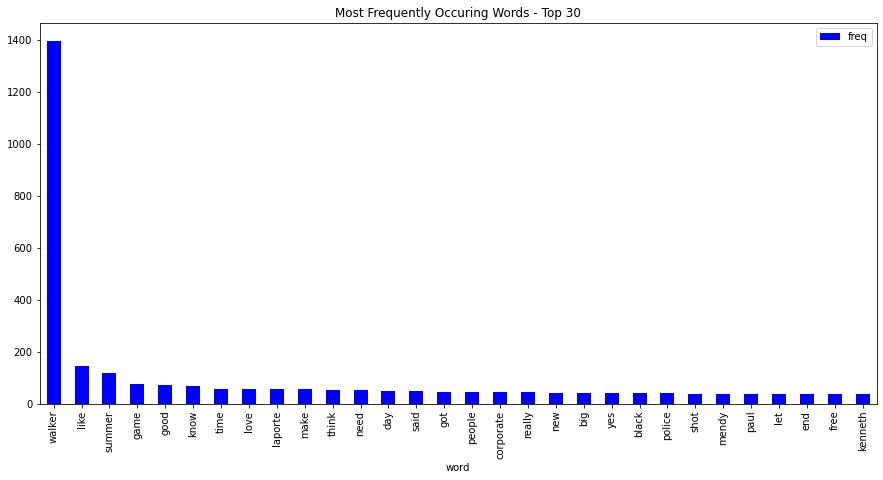

In [14]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tokens_cl)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Comments for Debate1')

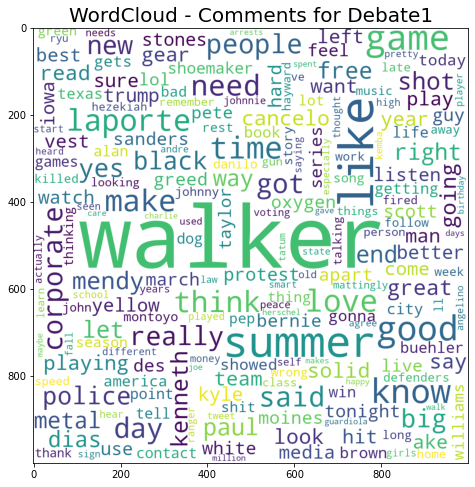

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Comments for Debate1", fontsize = 20)

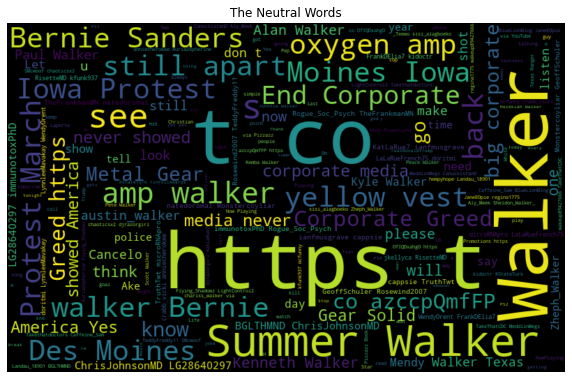

In [16]:
normal_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

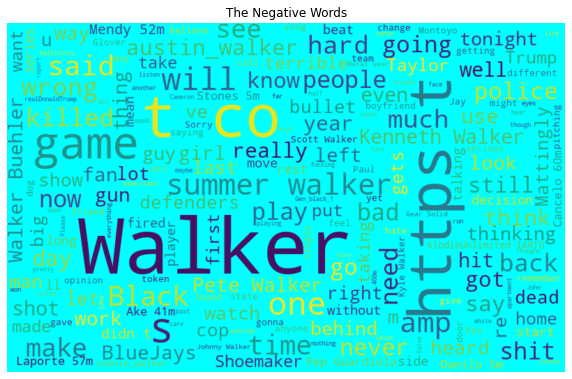

In [17]:
negative_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

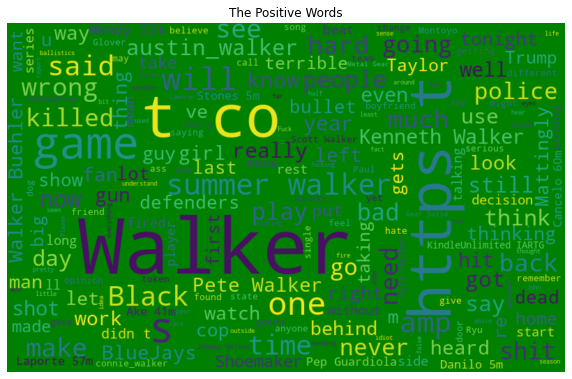

In [18]:
positive_words =' '.join([ content for content in df['content'][df['sentiment'] == 'Positive']])

wordcloud = WordCloud(background_color = 'green', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.show()

In [19]:
df.drop(['user_country','source','date'],axis=1,inplace=True)
df

,content,sentiment
0,@ianvictor69 i'll kill you - summer walker,Neutral
1,@YahooNews Yahoo's Francis stirs the pot but l...,Positive
2,Dias signing for Man City means Pep has signed...,Neutral
3,Pep Guardiola has spent over £400 million on d...,Negative
4,@samanthamarika1 Jameson/Johnnie Walker +🍿,Neutral
...,...,...
1995,"Why hasn't Kenneth Walker, Breonna Taylor's bo...",Negative
1996,Eating for the day Patriots use a Military Lou...,Negative
1997,He did WHAT?! https://t.co/o9yq5kVWeZ,Neutral
1998,@walker_slim @ruco_mon @JoeBiden You posted a ...,Positive


In [20]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [21]:
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [22]:
testing = df.content[:2000]

In [23]:
from bs4 import BeautifulSoup

In [24]:

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))

In [25]:
Cleaned_data= {'sentiment':df['sentiment'], 
        'content':test_result} 

In [26]:
data=pd.DataFrame(Cleaned_data)
data

,sentiment,content
0,Neutral,i ll kill you summer walker
1,Positive,yahoo s francis stirs the pot but lays low on ...
2,Neutral,dias signing for man city means pep has signed...
3,Negative,pep guardiola has spent over million on defend...
4,Neutral,jameson johnnie walker
...,...,...
1995,Negative,why hasn t kenneth walker breonna taylor s boy...
1996,Negative,eating for the day patriots use a military lou...
1997,Neutral,he did what
1998,Positive,slim mon you posted a meme so basically you ju...


In [27]:
df1=data[data.sentiment == 'Positive']

In [28]:
df2=data[data.sentiment == 'Negative']

In [29]:
df3=df1.append(df2) 
df3

,sentiment,content
1,Positive,yahoo s francis stirs the pot but lays low on ...
11,Positive,introducing your new soulcaliburvi walker of d...
12,Positive,nicola walker is amazing if you ever get the c...
13,Positive,from george washington carver to madam c j wal...
15,Positive,paul is elite while walker is very good i ll t...
...,...,...
1989,Negative,i listen to rod wave youngboy brent faiyaz sum...
1992,Negative,no we would be thrown in jail for tax fraud
1995,Negative,why hasn t kenneth walker breonna taylor s boy...
1996,Negative,eating for the day patriots use a military lou...


In [30]:
df3=df3.replace('Positive',1).replace('Negative',0)

In [31]:
df3

,sentiment,content
1,1,yahoo s francis stirs the pot but lays low on ...
11,1,introducing your new soulcaliburvi walker of d...
12,1,nicola walker is amazing if you ever get the c...
13,1,from george washington carver to madam c j wal...
15,1,paul is elite while walker is very good i ll t...
...,...,...
1989,0,i listen to rod wave youngboy brent faiyaz sum...
1992,0,no we would be thrown in jail for tax fraud
1995,0,why hasn t kenneth walker breonna taylor s boy...
1996,0,eating for the day patriots use a military lou...


In [32]:
from sklearn.model_selection import train_test_split
from nltk.stem.porter import PorterStemmer

In [33]:
train, test = train_test_split(df3, test_size=0.25, random_state=42)
print(train.shape)
print(test.shape)

(915, 2)
(305, 2)


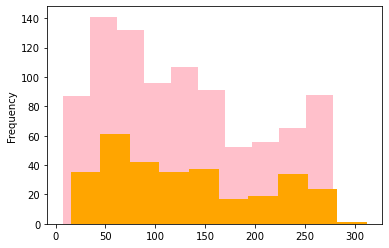

In [34]:
length_train = train['content'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['content'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [35]:
tokenized_tweet = train['content'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['content']), epochs=20)

(280588, 439180)

In [36]:
model_w2v.wv.most_similar(positive = "trump")

[('defence', 0.9376999139785767),
 ('years', 0.9354099035263062),
 ('house', 0.9350489377975464),
 ('minutes', 0.9325082898139954),
 ('blind', 0.9305897951126099),
 ('ted', 0.9297885298728943),
 ('biden', 0.9293835759162903),
 ('nobody', 0.9284488558769226),
 ('fifth', 0.9275290966033936),
 ('horrible', 0.9262637495994568)]

In [37]:
model_w2v.wv.most_similar(negative = "trump")

[('shot', -0.2794319987297058),
 ('her', -0.2879784405231476),
 ('police', -0.3017082214355469),
 ('heard', -0.32025784254074097),
 ('his', -0.320472776889801),
 ('gun', -0.3340683877468109),
 ('boyfriend', -0.33408111333847046),
 ('mattingly', -0.3437463641166687),
 ('cops', -0.3508237302303314),
 ('breonna', -0.35082411766052246)]

In [38]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow.keras as keras


In [39]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalMaxPooling1D, Flatten, Conv1D, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
Tr=train["content"].values.tolist()
Te=test["content"].values.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
x_train = cv.fit_transform(Tr).toarray()
y_train = train.iloc[:, 0]
y_test=test.iloc[:,0]
print(x_train.shape)
print(y_train.shape)

cv = CountVectorizer(max_features = 500)
x_test = cv.fit_transform(Te).toarray()

print(x_test.shape)

(915, 500)
(915,)
(305, 500)


In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9967213114754099
Validation Accuracy : 0.5114754098360655
F1 score : 0.555223880597015
[[ 63  38]
 [111  93]]


In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9836065573770492
Validation Accuracy : 0.6065573770491803
f1 score : 0.724770642201835
[[ 27  74]
 [ 46 158]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9967213114754099
Validation Accuracy : 0.47540983606557374
f1 score : 0.4482758620689655
[[ 80  21]
 [139  65]]


In [46]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9158469945355191
Validation Accuracy : 0.659016393442623
f1 score : 0.7944664031620553
[[  0 101]
 [  3 201]]


In [47]:
imdb_tokenizer = Tokenizer(num_words=500)
imdb_tokenizer.fit_on_texts(train['content'].values)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(train['content'].values)
x_val_seq = imdb_tokenizer.texts_to_sequences(test['content'].values)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = train['sentiment'].values, test['sentiment'].values

print('First sample before preprocessing: \n', train['content'].values[0], '\n')
print('First sample after preprocessing: \n', x_train[0])

First sample before preprocessing: 
 jerry jeff walker mr bojangles live 

First sample after preprocessing: 
 [  1 247 124   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0 

In [48]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [49]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 40)           1200000   
_________________________________________________________________
dropout (Dropout)            (None, 500, 40)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250) 

In [50]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
7/7 - 1s - loss: 0.6699 - accuracy: 0.6051 - val_loss: 0.6384 - val_accuracy: 0.6739
Epoch 2/20
7/7 - 1s - loss: 0.6400 - accuracy: 0.6598 - val_loss: 0.6317 - val_accuracy: 0.6739
Epoch 3/20
7/7 - 1s - loss: 0.6372 - accuracy: 0.6598 - val_loss: 0.6317 - val_accuracy: 0.6739
Epoch 4/20
7/7 - 1s - loss: 0.6290 - accuracy: 0.6598 - val_loss: 0.6283 - val_accuracy: 0.6739
Epoch 5/20
7/7 - 1s - loss: 0.6209 - accuracy: 0.6598 - val_loss: 0.6194 - val_accuracy: 0.6739
Epoch 6/20
7/7 - 1s - loss: 0.6033 - accuracy: 0.6598 - val_loss: 0.6030 - val_accuracy: 0.6739
Epoch 7/20
7/7 - 1s - loss: 0.5743 - accuracy: 0.6598 - val_loss: 0.5741 - val_accuracy: 0.6739
Epoch 8/20
7/7 - 1s - loss: 0.5254 - accuracy: 0.6610 - val_loss: 0.5291 - val_accuracy: 0.6848
Epoch 9/20
7/7 - 1s - loss: 0.4610 - accuracy: 0.7230 - val_loss: 0.4871 - val_accuracy: 0.7283
Epoch 10/20
7/7 - 1s - loss: 0.4032 - accuracy: 0.8299 - val_loss: 0.4498 - val_accuracy: 0.7717
Epoch 11/20
7/7 - 1s - loss: 0.3541 - a

In [51]:
df4=data.replace('Positive',1).replace('Negative',0).replace('Neutral',-1)
df4

,sentiment,content
0,-1,i ll kill you summer walker
1,1,yahoo s francis stirs the pot but lays low on ...
2,-1,dias signing for man city means pep has signed...
3,0,pep guardiola has spent over million on defend...
4,-1,jameson johnnie walker
...,...,...
1995,0,why hasn t kenneth walker breonna taylor s boy...
1996,0,eating for the day patriots use a military lou...
1997,-1,he did what
1998,1,slim mon you posted a meme so basically you ju...


In [52]:
X=df4['content']
Y=df4['sentiment']
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [53]:
TR=X_train.tolist()
TE=X_valid.tolist()
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 500)
X_Train = cv.fit_transform(TR).toarray()
Y1 = Y_train
Y_test=Y_valid
print(X_Train.shape)
print(Y1.shape)

cv = CountVectorizer(max_features = 500)
X_test = cv.fit_transform(TE).toarray()

print(X_test.shape)

(1500, 500)
(1500,)
(500, 500)


In [54]:
print(X_Train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_valid.shape)

(1500, 500)
(500, 500)
(1500,)
(500,)


In [55]:
model = RandomForestClassifier()
model.fit(X_Train, Y_train)

Y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(Y_valid, Y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_valid, Y_pred)
print(cm)

Training Accuracy : 0.992
Validation Accuracy : 0.49
F1 score : [0.55445545 0.16107383 0.54138702]
[[112  19  65]
 [ 31  12  58]
 [ 65  17 121]]


In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.9026666666666666
Validation Accuracy : 0.45
f1 score : [0.49230769 0.33183857 0.4754522 ]
[[96 37 63]
 [35 37 29]
 [63 48 92]]


In [57]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.992
Validation Accuracy : 0.444
f1 score : [0.46111111 0.30051813 0.49217002]
[[ 83  27  86]
 [ 24  29  48]
 [ 57  36 110]]


In [58]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_Train, Y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_Train, Y_train))
print("Validation Accuracy :", model.score(X_test, Y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(Y_test, y_pred,average=None))

# confusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

Training Accuracy : 0.8573333333333333
Validation Accuracy : 0.534
f1 score : [0.6076555  0.05660377 0.57563025]
[[127   0  69]
 [ 31   3  67]
 [ 64   2 137]]


In [59]:
X_Train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
imdb_tokenizer = Tokenizer(num_words=500)
TRain=pd.DataFrame(X_Train)
TEst=pd.DataFrame(X_test)
YTrain=pd.DataFrame(Y_train)
YTest=pd.DataFrame(Y_test)
imdb_tokenizer.fit_on_texts(TR)
MAX_LEN=500

x_train_seq = imdb_tokenizer.texts_to_sequences(TR)
x_val_seq = imdb_tokenizer.texts_to_sequences(TE)

x_train = sequence.pad_sequences(x_train_seq, maxlen=MAX_LEN, padding="post", value=0)
x_val = sequence.pad_sequences(x_val_seq, maxlen=MAX_LEN, padding="post", value=0)

y_train, y_val = YTrain['sentiment'].values, YTest['sentiment'].values

print('First sample before preprocessing: \n', TR, '\n')
print('First sample after preprocessing: \n', X_Train[0])

First sample before preprocessing: 
 ['t pace like a prime kyle walker', 'good reading all of us are planning on voting from space astronaut shannon walker explains plans for the crew astronauts to vote from the station see more', 'johnnie walker double black on the rocks debates keepwalking', 'over it by summer walker cause it ll make u feel like the bad bishhh that u areee', 'robrien no problem jen as well as can be at this time looking forward to coming back to uom in january', 'shaw borucki nate walker exactly i made a mistake boo hoo', 'summer walker killed it on the late late show', 'rum and cranberry juice a plenty here pregaming in preparation for the shit show', 'i wouldn t worry about deone we got walker who is uber talented and austin larkin needs to get on the damn field now that dude is a dog', 'i wonder if all his forms start getting upgrades then we can build up to like an earth walker on steroids lol', 'distance or death brings tough memories they hit hard and the emoti

In [61]:
NUM_FILTERS = 250
KERNEL_SIZE = 5
HIDDEN_DIMS = 250

BATCH_SIZE = 128 # Number of examples used in each iteration
EPOCHS = 20 # Number of passes through entire dataset
VOCAB_SIZE = 30000 # Size of vocabulary dictionary
MAX_LEN = 500 # Max length of review (in words)
EMBEDDING_DIM = 40 # Dimension of word embedding vector

In [62]:
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into EMBEDDING_DIM dimensions
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn NUM_FILTERS filters
model.add(Conv1D(NUM_FILTERS,
                 KERNEL_SIZE,
                 padding='valid',
                 activation='relu',
                 strides=1))

# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(HIDDEN_DIMS))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 40)           1200000   
_________________________________________________________________
dropout_2 (Dropout)          (None, 500, 40)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 250)          50250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250

In [63]:
model.fit(x_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_split=0.1,
          verbose=2)

# Evaluate the model
score, acc = model.evaluate(x_val, y_val, batch_size=BATCH_SIZE)
print('\nAccuracy: ', acc*100)

pred = model.predict_classes(x_val)

Epoch 1/20
11/11 - 2s - loss: 0.3975 - accuracy: 0.1985 - val_loss: 0.2592 - val_accuracy: 0.2733
Epoch 2/20
11/11 - 2s - loss: 0.0386 - accuracy: 0.1993 - val_loss: 0.2956 - val_accuracy: 0.2733
Epoch 3/20
11/11 - 2s - loss: 0.0355 - accuracy: 0.1993 - val_loss: 0.3541 - val_accuracy: 0.2733
Epoch 4/20
11/11 - 2s - loss: 0.0088 - accuracy: 0.1993 - val_loss: 0.2418 - val_accuracy: 0.2733
Epoch 5/20
11/11 - 2s - loss: -2.0247e-01 - accuracy: 0.1993 - val_loss: -2.0586e-03 - val_accuracy: 0.2733
Epoch 6/20
11/11 - 2s - loss: -6.8839e-01 - accuracy: 0.1993 - val_loss: -2.9864e-01 - val_accuracy: 0.2733
Epoch 7/20
11/11 - 2s - loss: -1.9789e+00 - accuracy: 0.1993 - val_loss: -1.2042e+00 - val_accuracy: 0.2867
Epoch 8/20
11/11 - 2s - loss: -5.3516e+00 - accuracy: 0.2074 - val_loss: -3.2417e+00 - val_accuracy: 0.3067
Epoch 9/20
11/11 - 2s - loss: -1.3665e+01 - accuracy: 0.2459 - val_loss: -7.6157e+00 - val_accuracy: 0.3200
Epoch 10/20
11/11 - 2s - loss: -2.8749e+01 - accuracy: 0.2341 - val_